#### Recursive solution
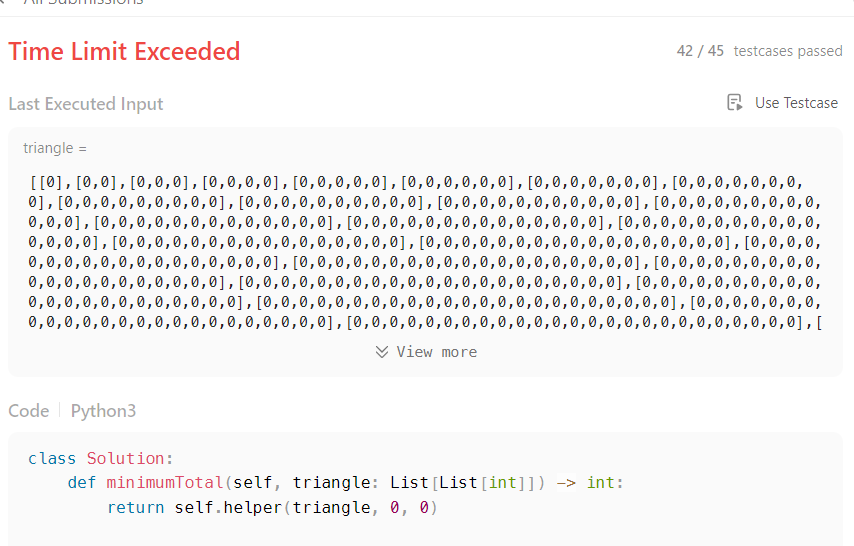

In [1]:
from typing import List
class Solution:
    def minimumTotal(self, triangle: List[List[int]]) -> int:
        return self.helper(triangle, 0, 0)

    def helper(self, tri, row, col):
        rows = len(tri)
        if col > len(tri[row]) or col < 0:
            return 0

        if row == rows -1:
            return tri[row][col]

        takesameindex = tri[row][col] + self.helper(tri, row + 1, col)
        takenextindex = tri[row][col] + self.helper(tri, row + 1, col + 1 )
        return min(takesameindex, takenextindex)


# Top down
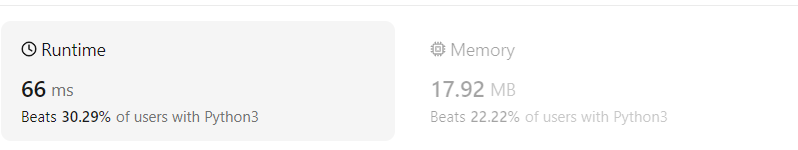

In [5]:
class Solution:
    def minimumTotal(self, triangle: List[List[int]]) -> int:
        rows = len(triangle)
        dp = [[-1 for _ in range(rows)]for _ in range(rows)]
        minpathsum = self.helper(dp, triangle, 0, 0)
        print(dp)
        return minpathsum

    def helper(self,dp, tri, row, col):
        rows = len(tri)
        if col > len(tri[row]) or col < 0:
            return 0

        if row == rows -1:
            return tri[row][col]
            
        if dp[row][col] == -1:
            takesameindex = tri[row][col] + self.helper(dp, tri, row + 1, col)
            takenextindex = tri[row][col] + self.helper(dp, tri, row + 1, col + 1 )
            dp[row][col] = min(takesameindex, takenextindex)
        return dp[row][col]

In [6]:
triangle = [[2],[3,4],[6,5,7],[4,1,8,3]]
sol = Solution()
sol.minimumTotal(triangle)

[[11, -1, -1, -1], [9, 10, -1, -1], [7, 6, 10, -1], [-1, -1, -1, -1]]


11

## Bottom Up Approach  -- Copied Solution

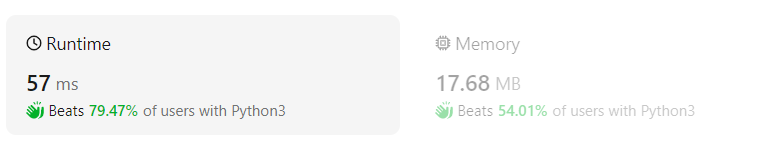

In [54]:
class Solution:
    def minimumTotal(self, triangle: List[List[int]]) -> int:
        dp = [0] * (len(triangle) + 1)

        for nums in triangle[::-1]:
            for j in range(len(nums)):
                dp[i] = nums[j] + min(dp[j], dp[j+1] )
        print(dp)
        return dp[0]

In [55]:
triangle = [[2],[3,4],[6,5,7],[4,1,8,3]]
sol = Solution()
sol.minimumTotal(triangle)

[11, 10, 10, 3, 0]


11

## Bottom Up - My solution after watching video
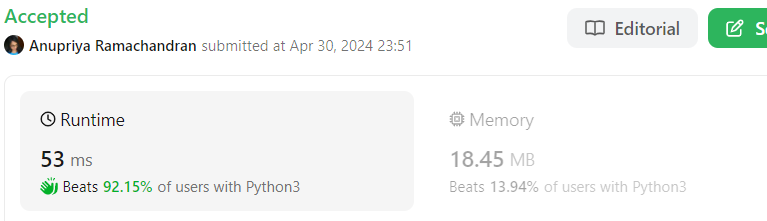


In [57]:
# Using 2D Array - My solution after watching video
class Solution:
    def minimumTotal(self, triangle: List[List[int]]) -> int:
        rows = len(triangle)
        dp = [[0 for _ in range(rows)] for _ in range(rows)]

        for j in range(rows):
            dp[rows -1][j] = triangle[rows-1][j]

        for i in range(rows -2, -1, -1):
            for j in range(i, -1, -1):
                takesameindex = triangle[i][j] + dp[i + 1][j]
                takenextindex = triangle[i][j] + dp[i+1][j + 1]
                dp[i][j] = min(takesameindex, takenextindex)
        print(dp)            
        return dp[0][0]
        

## Space Optimzed Solution

something i + 1  -> prev   { usually it is i-1}
### Basic idea 
Last row  - Base case -> start from last and fill up dp table until the top  
so to fill up i row , we need i + 1 row   
so to fill up current row we need prev(i +1) row  

so we just need 2 rows -> current row (which is getting computed) and prev row , when current row computed , current row become the previous row  

### Steps:
1. Replace 2D dp with 1D array called prev  
2. Base check computation , store it in prev  
3. Whereever *dp[i+1]* (which indicates previous dp row, can be dp[i-1] as well, if done from 0 to n looping) with *prev*
4. Then replace *dp[i][j]* with *cur[j]*
5. Then *copy cur in prev* (here we are creating a copy after loop , since its array)
6. Then return prev[0] instead of dp[0][0]  {since we are already storing cur in prev., which has the last step info}

In [58]:
class Solution:
    def minimumTotal(self, triangle: List[List[int]]) -> int:
        rows = len(triangle)
        # dp = [[0 for _ in range(rows)] for _ in range(rows)]   # replace dp with 1D array - prev
        prev = [0 for _ in range(rows)]
        cur = [0] * rows      # cur also will be an array
        
        # for j in range(rows):
        #     dp[rows -1][j] = triangle[rows-1][j]  # base step computation will be stored in prev
        for j in range(rows):
            prev[j] = triangle[rows-1][j] 
            
        for i in range(rows -2, -1, -1):
            for j in range(i, -1, -1):
                takesameindex = triangle[i][j] + prev[j]    # replaced  dp[i+1] with prev
                takenextindex = triangle[i][j] + prev[j + 1]
                # dp[i][j] = min(takesameindex, takenextindex)    # computation step replace with cur 
                cur[j] = min(takesameindex, takenextindex)
            prev = cur.copy()                   # since array copy cur in prev                

        # return dp[0][0]    # replace dp[0][0] with prev[0]
        return prev[0]

In [59]:
# without comments
class Solution:
    def minimumTotal(self, triangle: List[List[int]]) -> int:
        rows = len(triangle)
        dp = [[0 for _ in range(rows)] for _ in range(rows)]

        for j in range(rows):
            dp[rows -1][j] = triangle[rows-1][j]

        for i in range(rows -2, -1, -1):
            for j in range(i, -1, -1):
                takesameindex = triangle[i][j] + dp[i + 1][j]
                takenextindex = triangle[i][j] + dp[i+1][j + 1]
                dp[i][j] = min(takesameindex, takenextindex)           
        return dp[0][0]
  